In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
#Get and filter dataset

df = pd.read_csv("../../../seqprop/examples/optimus5/GSM3130435_egfp_unmod_1.csv")

df = df.query("total_reads >= 200").copy().reset_index(drop=True)
df = df.sort_values('rl', ascending=False).copy().reset_index(drop=True)

print("len(df) = " + str(len(df)))


len(df) = 292043


In [3]:

df = df.loc[~df['utr'].str.contains("ATG")].copy().reset_index(drop=True)
df = df.loc[df['utr'].str.slice(0, 2) != "TG"].copy().reset_index(drop=True)

df = df.loc[~df['utr'].str.contains("TAG")].copy().reset_index(drop=True)
df = df.loc[~df['utr'].str.contains("TGA")].copy().reset_index(drop=True)
df = df.loc[~df['utr'].str.contains("TAA")].copy().reset_index(drop=True)

print("len(df) = " + str(len(df)))


len(df) = 10751


In [4]:

df = df[['utr', 'total_reads', 'rl']].sort_values('rl', ascending=True).copy().reset_index(drop=True)


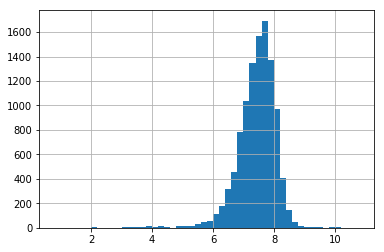

In [5]:

f = plt.figure()

df['rl'].hist(bins=50)

plt.show()


In [6]:

lower_qt = 0.05
upper_qt = 0.10

lower_qt_val = np.quantile(df['rl'].values, q=lower_qt)
upper_qt_val = np.quantile(df['rl'].values, q=upper_qt)

df_bottom = df.query("rl >= " + str(lower_qt_val) + " and rl < " + str(upper_qt_val)).copy().reset_index(drop=True)

print("len(df_bottom) = " + str(len(df_bottom)))


len(df_bottom) = 537


In [7]:

pd.options.display.max_colwidth = 100


In [8]:
df_bottom

,utr,total_reads,rl
0,AAGTTTCATACGCCAAAAGGTGGCGGGGCGGACAGTATTCCGTCGACAGG,688.0,6.375172
1,CCAAAGGCTCAGTGGGGTCCCCGAGCTCCTTTGCGGAGTTCGGCAACGAT,704.0,6.376718
2,GGCGGTGCAAGGTACGACCAGGCCCGGGGGTACACAACGGTATCCGGGTT,365.0,6.377404
3,CGAGAGGCATCCAGAGTCACCTTGTCGCTGGGGGCCCCCGGGAAAATTCC,581.0,6.378402
4,TATTCAGGCACACCGATTATTACGCGTTCAGAGCCGGGCCCGGGGTGCGC,577.0,6.379614
5,AGAACAACACGACCGGGCCCATCCTCGGGCGCCGCAGGGAGAAAAGTTCA,1602.0,6.379766
6,GGATTCACCTGGCGCCCGGAGGCAGTACGGTCCGTCGCCACCACGAGTTC,907.0,6.380277
7,CATACGAAATCTTCGATCGTATACCGGCACGGAGTGGCAAGCCCACGTAC,590.0,6.381529
8,CCGAACTGCAATCAGAGTCGTTGCAGAGAGAGGTTCGCGCACCCCGCGCG,1350.0,6.382056
9,GGGCCGGCAACGTCCCTCGCAGTGGTTCACGTCCAAGAGGCACGGACCGG,430.0,6.382508


In [9]:

n = 512

atg_poses = [8, 11, 14]
tag_poses_1 = [35, 38, 41, 44]
tag_poses_2 = {
    35 : [38, 41, 44, 47],
    38 : [41, 44, 47],
    41 : [44, 47],
    44 : [47]
}

seqs = []
gts = []

for seq_ix in range(n) :
    
    sampled_ix = np.random.choice(len(df_bottom))
    
    seq = df_bottom.iloc[sampled_ix]['utr']
    gt = "N" * 50

    atg_pos = np.random.choice(atg_poses)
    tag_pos_1 = np.random.choice(tag_poses_1)
    tag_pos_2 = np.random.choice(tag_poses_2[tag_pos_1])
    
    seq = seq[:atg_pos] + "ATG" + seq[atg_pos+3:tag_pos_1] + "TAG" + seq[tag_pos_1+3:tag_pos_2] + "TAG" + seq[tag_pos_2+3:]
    gt = gt[:atg_pos] + "AAA" + gt[atg_pos+3:tag_pos_1] + "XXX" + gt[tag_pos_1+3:tag_pos_2] + "YYY" + gt[tag_pos_2+3:]
    
    seqs.append(seq)
    gts.append(gt)


In [10]:

seq_df = pd.DataFrame({"utr" : seqs, "gt" : gts})

seq_df.to_csv("optimus5_synthetic_if_uorf_1_start_2_stop_variable_loc.csv", index=False)
